In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
from scipy.io import loadmat
from scipy.optimize import minimize
import seaborn as sns
import warnings

import bhv_analysis as bhv
import bhv_model as model
import rl_model as rl

import pickle

In [114]:
master = bhv.loadData().sort_values(by=['date','trial'])
dates = master['date'].unique()
subset = master[master['date'].isin(dates[:5])]

In [11]:
RW = rl.RescorlaWagnerModel()
_,_ = RW.fit(master, min_type='global')

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nate/Desktop/Rotations/Wallis/Code/bhv_model.py:69: RuntimeWarning: overflow encountered in exp
  return (1 + np.exp(w2 * (ql - qr) + w3))**-1
/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]


In [4]:
with open('RW_20200531.pkl','rb') as f:
    RW = pickle.load(f)

In [11]:
n_trials = RW.sims.shape[0]

In [19]:
choice_rs = RW.sims['choice'].to_numpy().reshape((n_trials*100,))

In [18]:
trials = np.tile(np.arange(n_trials),100)

In [12]:
RW.aic

17895.974113898425

In [22]:
sim = RW.sims

In [142]:
RW.aic

17895.974113898425

In [75]:
test = sim[sim['date']=='2019-08-01'].head(10)

In [99]:
test_rs = test['value1'].set_index(np.arange(10)+1).stack().droplevel(1)

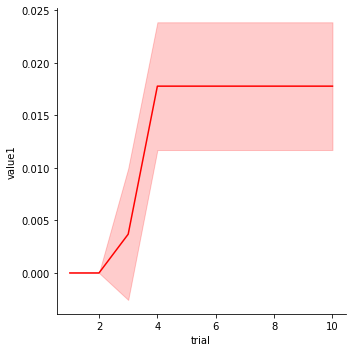

In [109]:
sns.relplot(x='trial', y='value1', data=pd.DataFrame({'trial':test_rs.index.to_numpy(), 'value1':test_rs}), \
           kind='line', ci='sd', color='red')

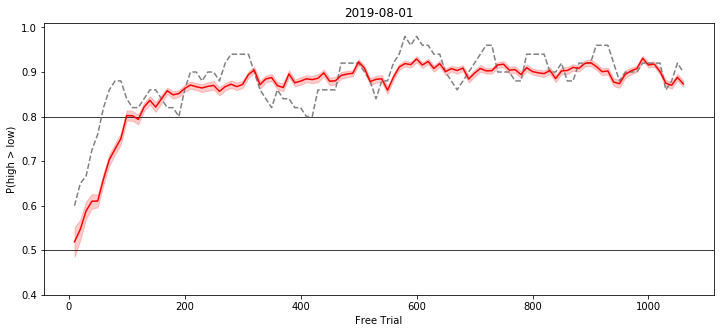

In [112]:
bhv.plotSession(sim,'2019-08-01',series1='model',series2='perf',win_size=50,min_trials=10,win_step=10)

In [158]:
RWd = rl.LRDecayRescorlaWagnerModel()
_,_ = RWd.fit(master, min_type='local')

[autoreload of rl_model failed: Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: simulate() requires a code object with 1 free vars, not 0
]
/User

In [160]:
RWd.aic

23750.18944905124

In [159]:
RWd.params_fit

,alpha,beta,lr_bias,tau
2019-08-01,0.0484614,-39.8266,0.274855,0.003354
2019-08-02,1,-5.87061,0.587182,0.000000
2019-08-06,0.119704,-0.698664,-0.340406,0.006876
2019-08-07,0.0447752,-61.106,0.14671,0.000309
2019-08-08,0.0432479,-75.4564,0.292281,0.000384
2019-08-09,0.233738,-28.0124,-0.25605,0.007312
2019-08-11,0.329866,-33.0378,-0.0776114,0.026152
2019-08-12,1,-4.83426,-0.38544,0.000000
2019-08-14,0.0880414,-40.2085,-0.449727,0.008101
2019-08-15,0.0070062,-186.403,-0.095636,0.002360


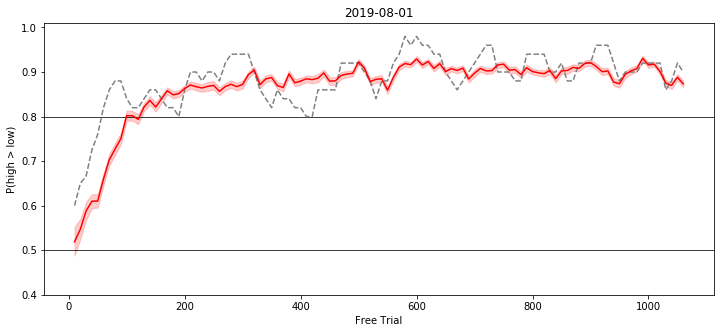

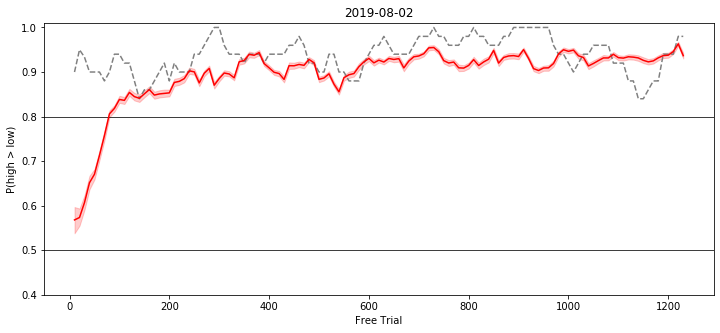

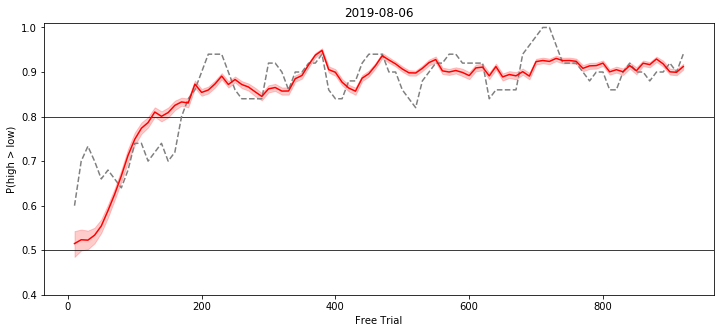

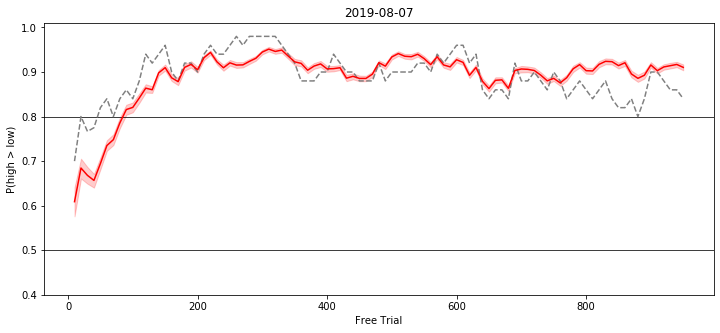

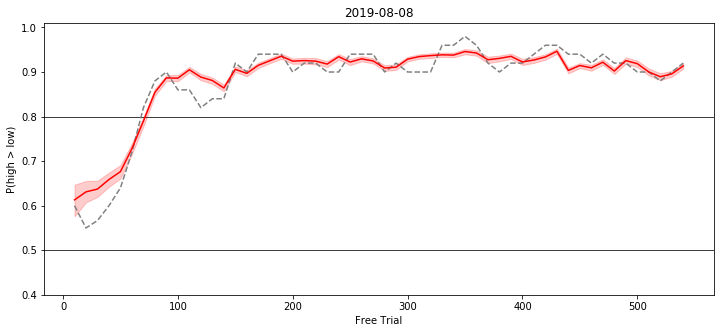

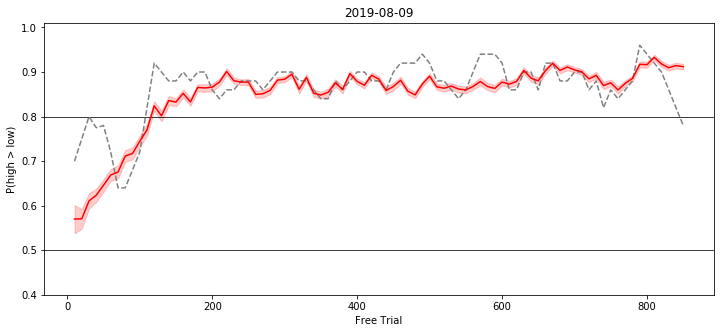

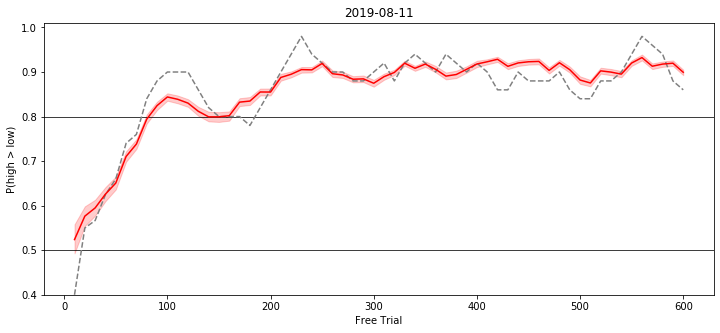

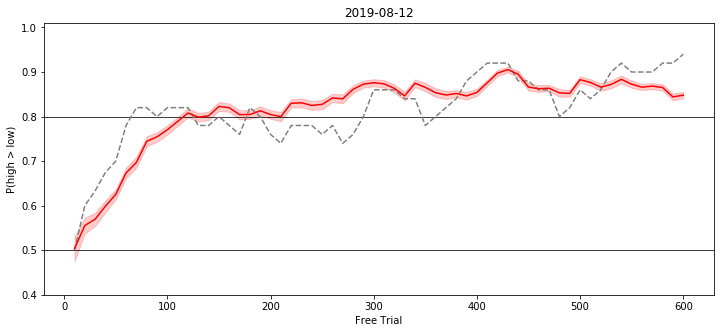

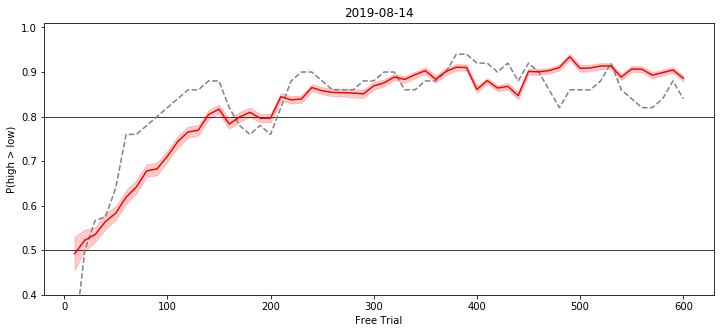

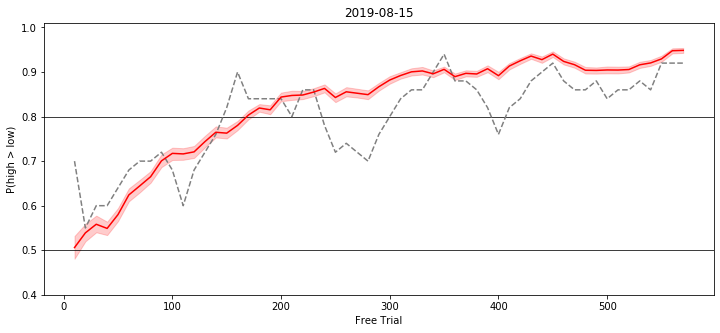

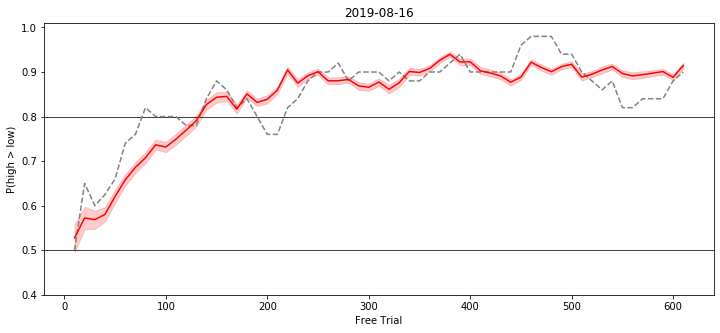

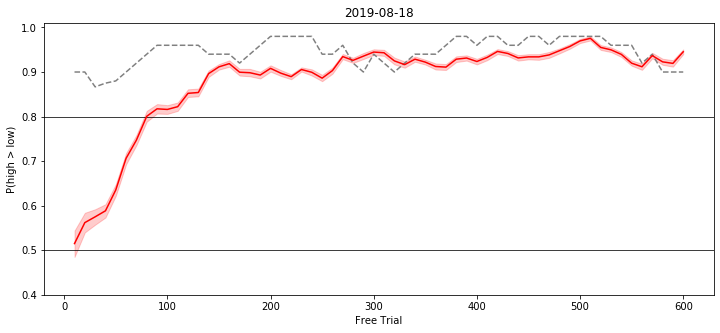

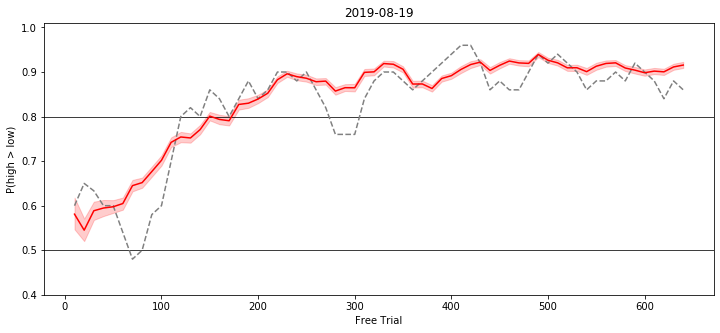

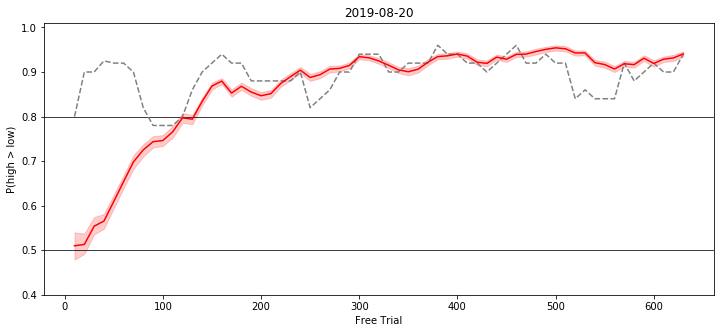

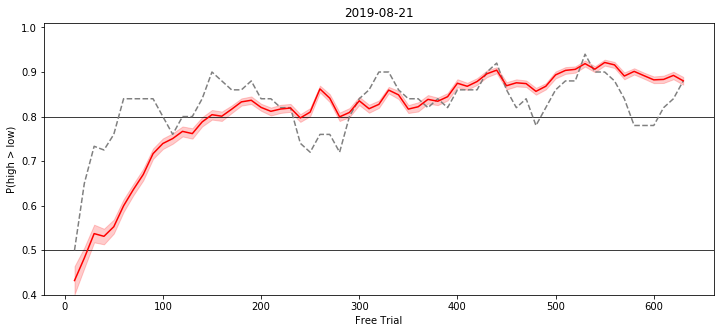

In [113]:
for date in sim['date'].unique()[:15]:
    bhv.plotSession(sim,date,series1='model',series2='perf',win_size=50,min_trials=10,win_step=10)

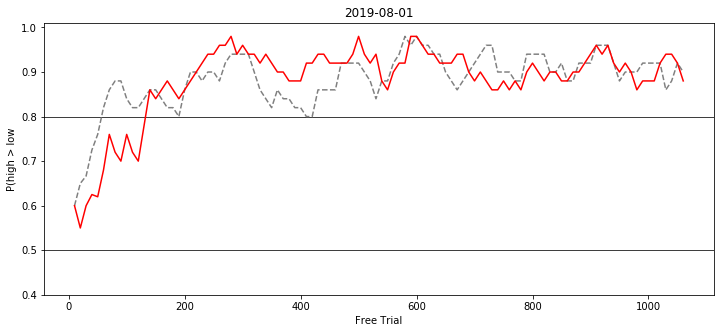

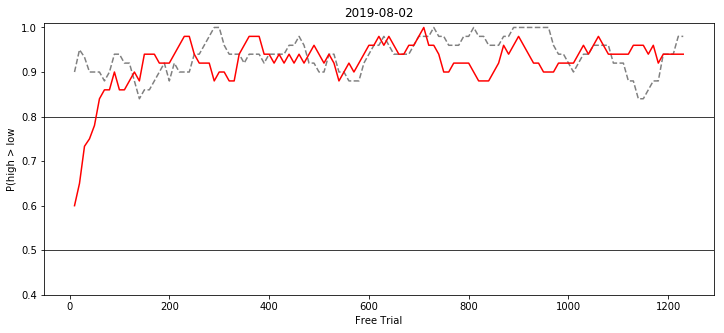

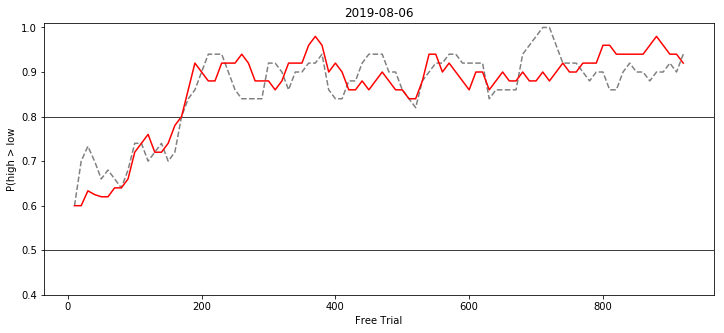

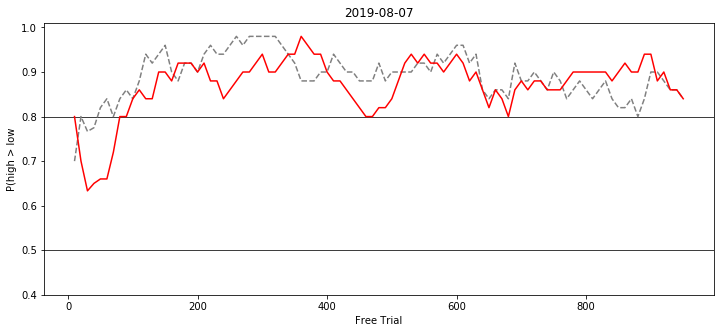

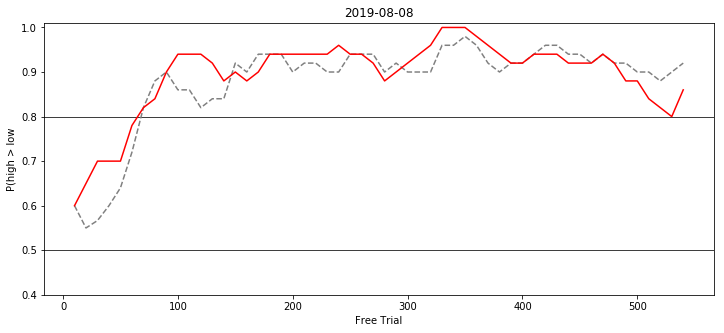

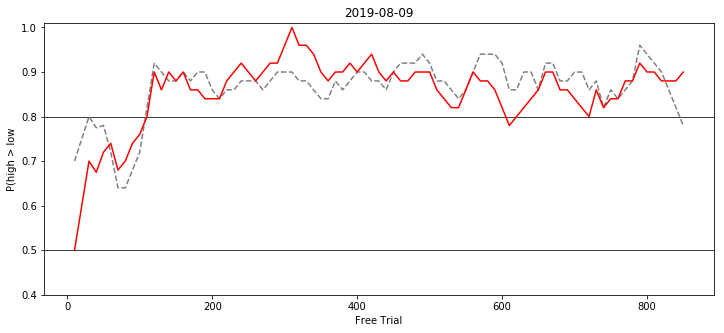

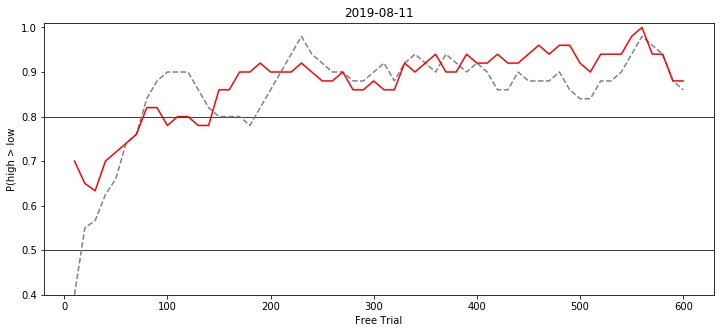

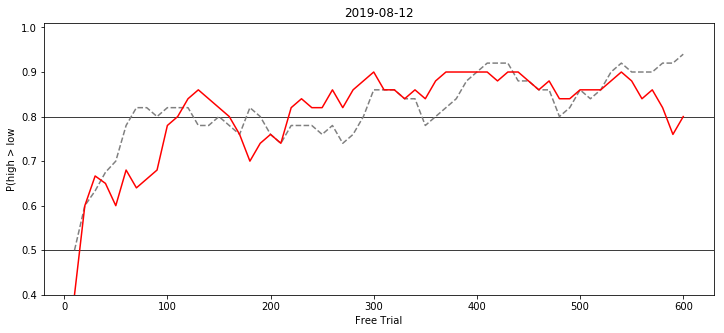

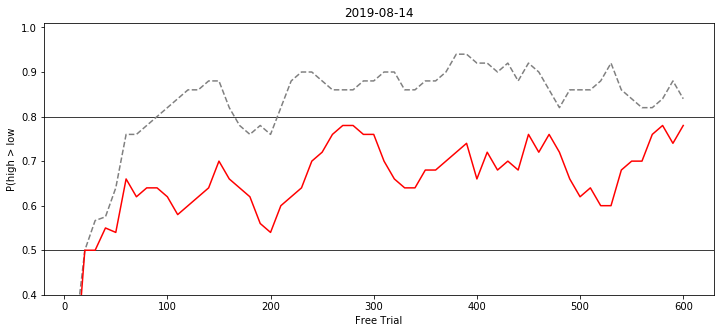

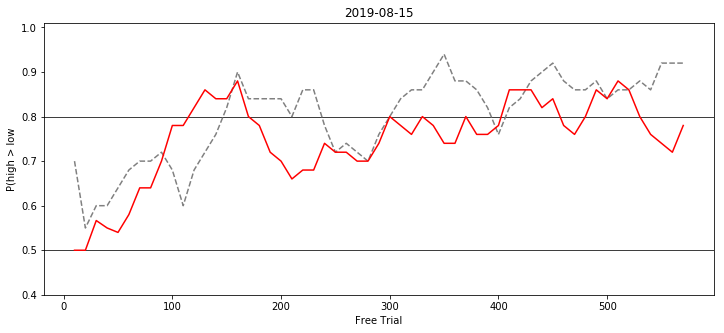

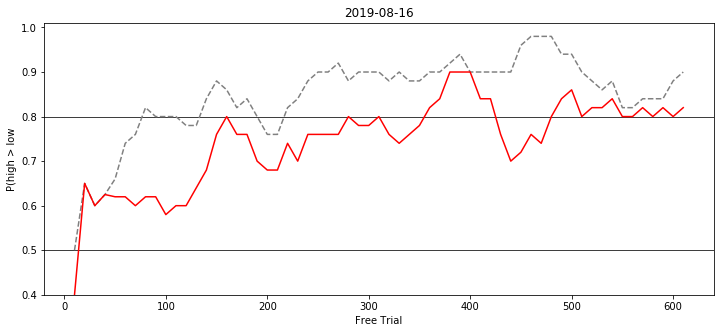

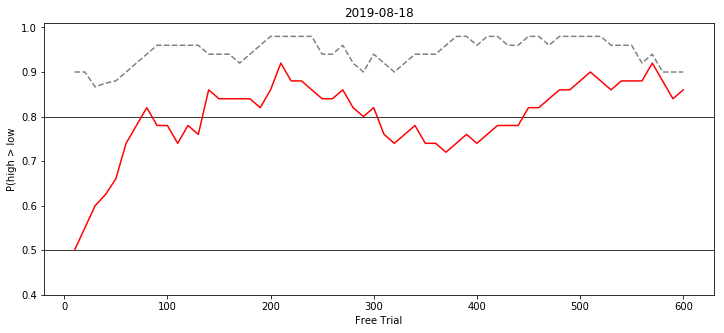

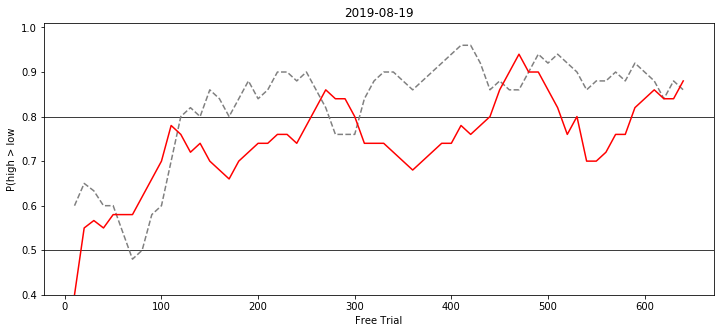

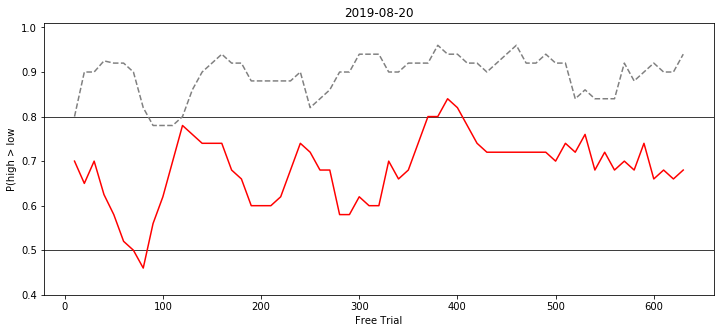

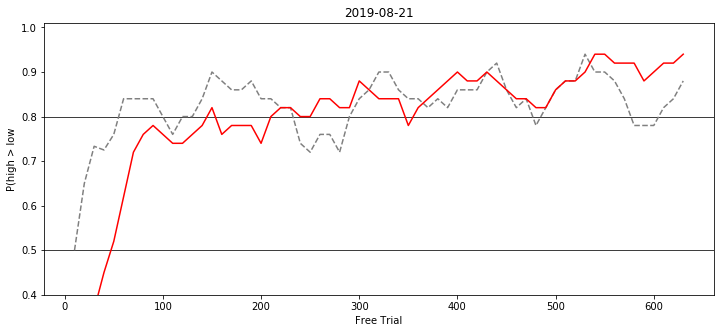

In [124]:
for date in sim['date'].unique()[:15]:
    bhv.plotSession(sim,date,series1='model',series2='perf',win_size=50,min_trials=10,win_step=10)

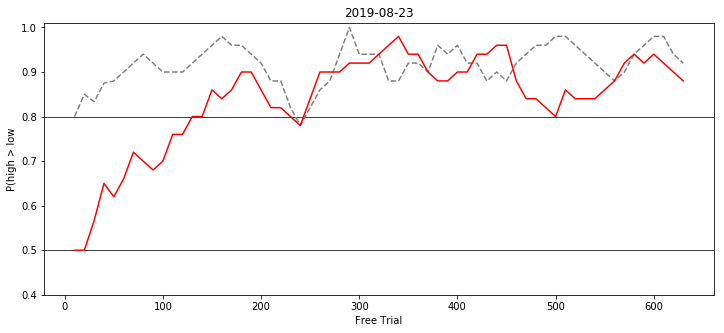

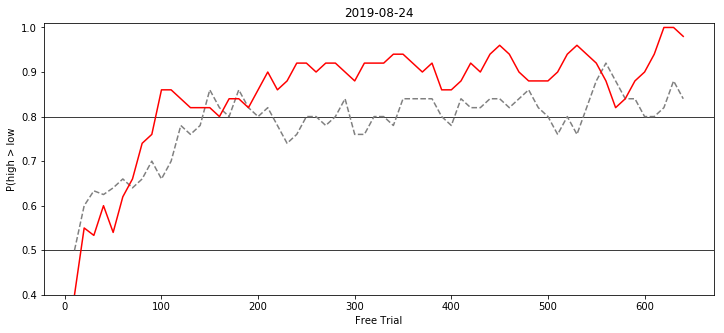

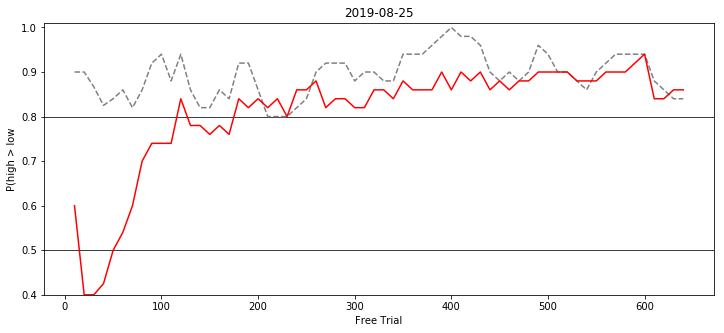

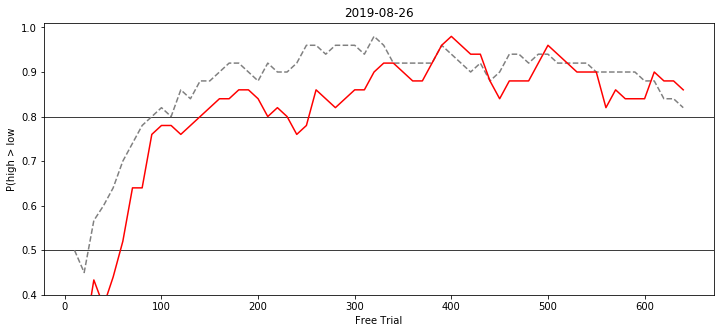

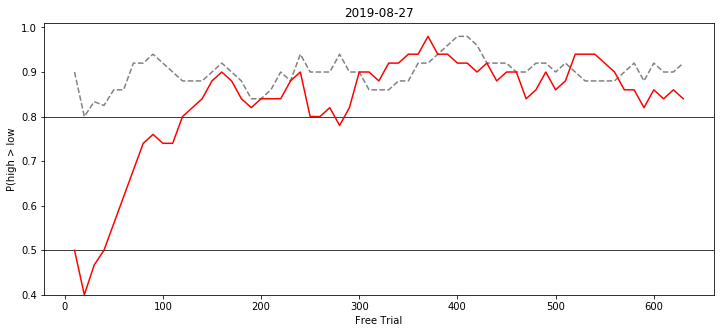

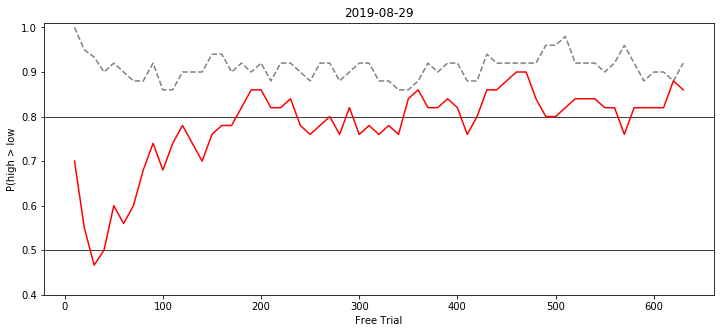

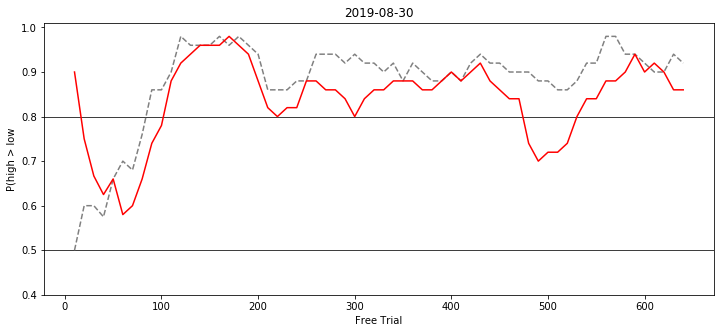

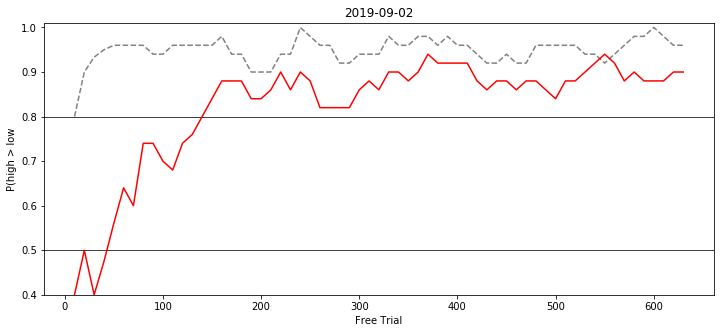

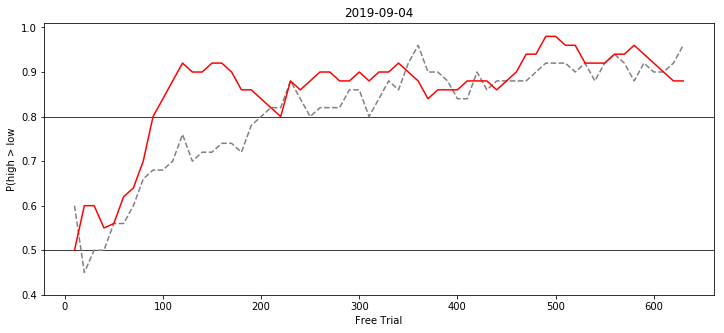

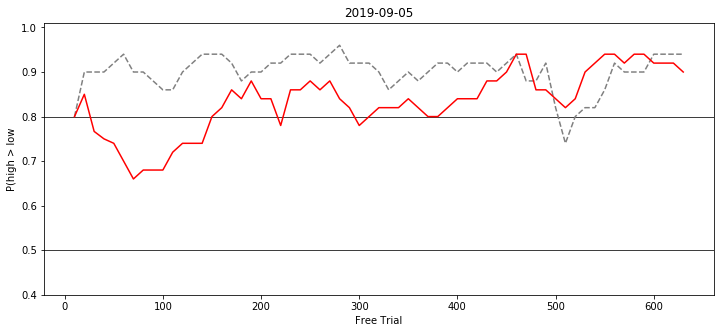

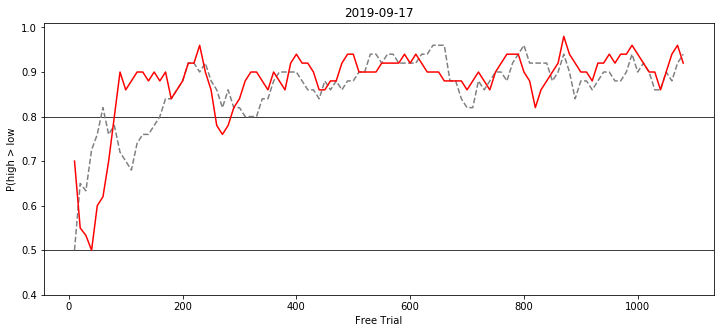

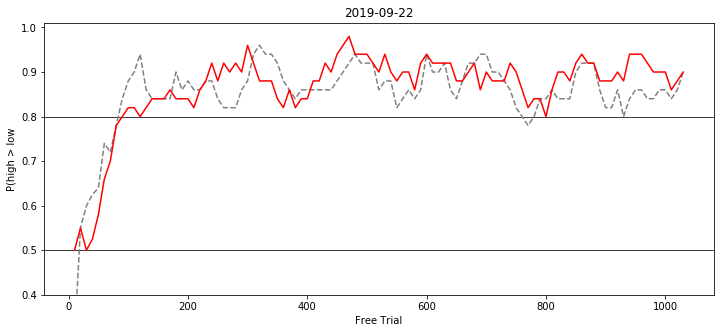

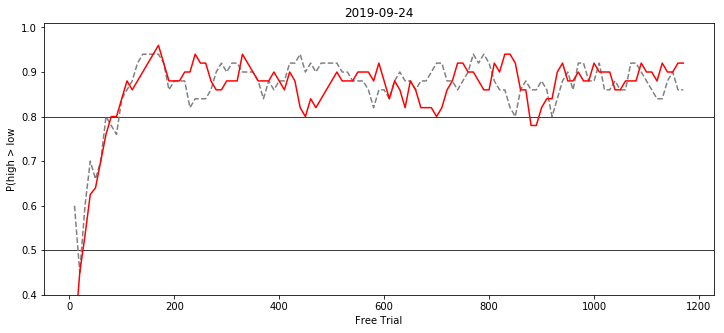

In [169]:
for date in df['date'].unique()[15:-15]:
    bhv.plotSession(df,date,series1='model',series2='perf',win_size=50,min_trials=10,win_step=10)

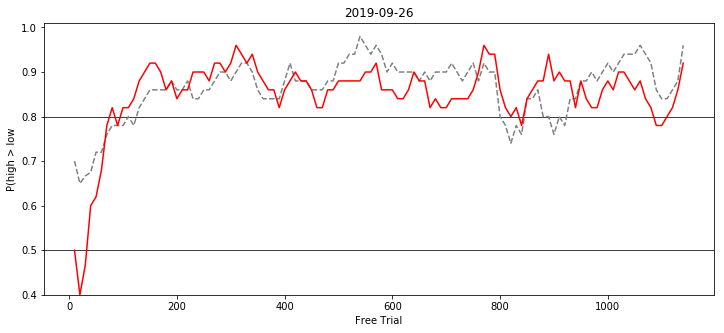

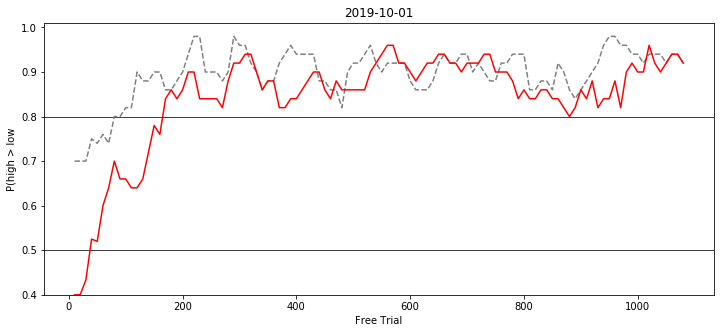

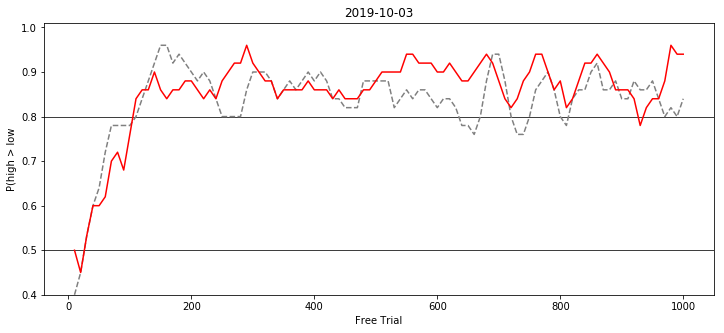

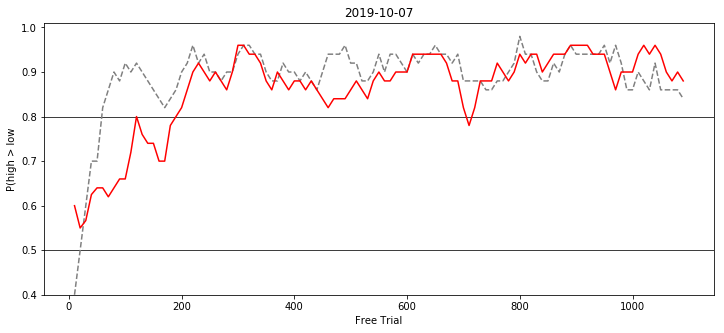

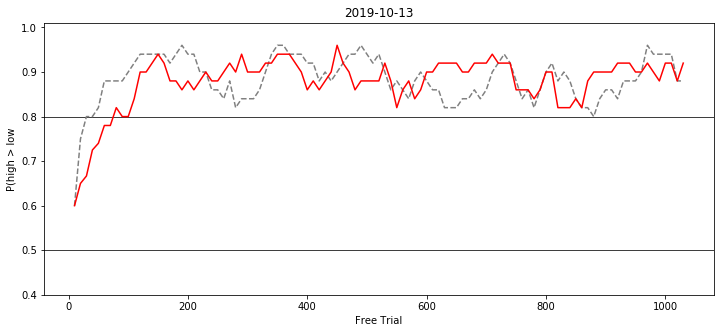

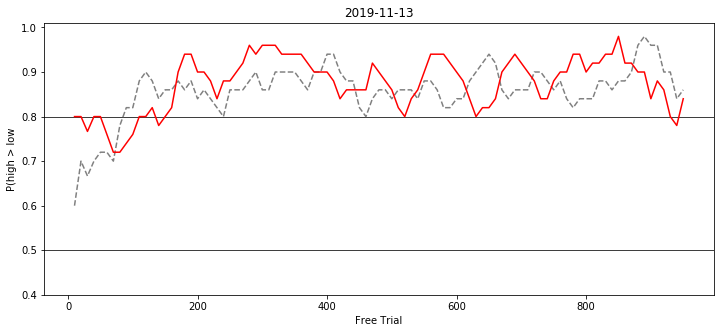

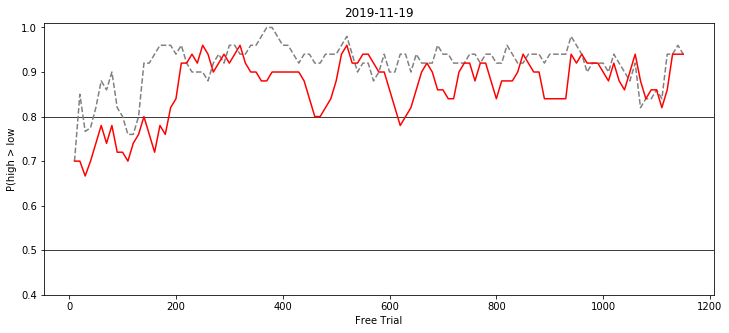

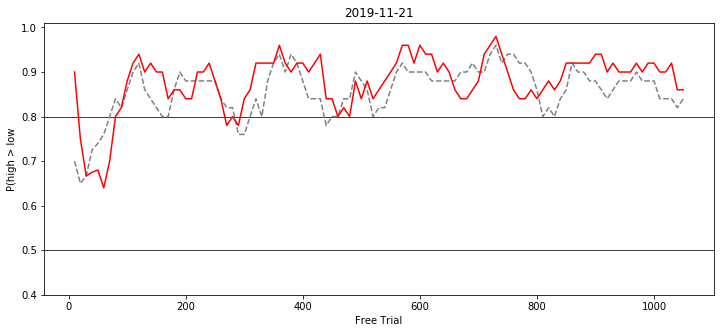

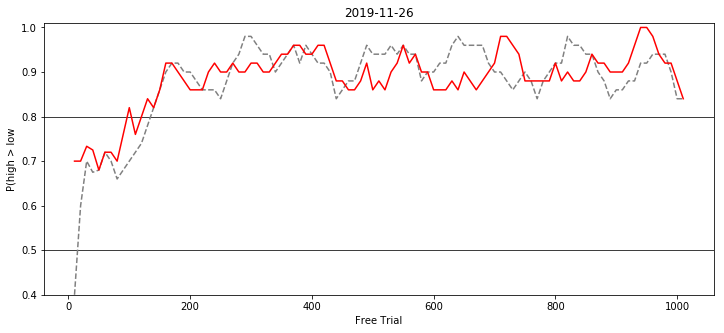

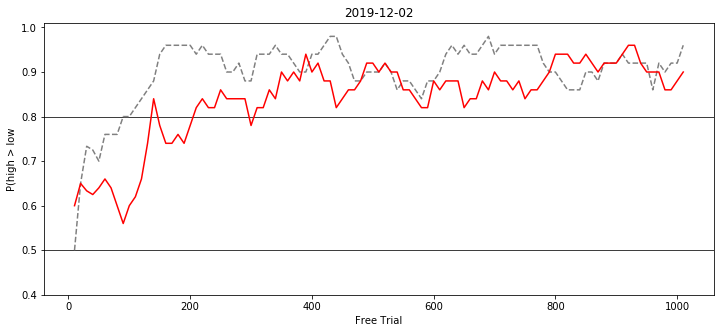

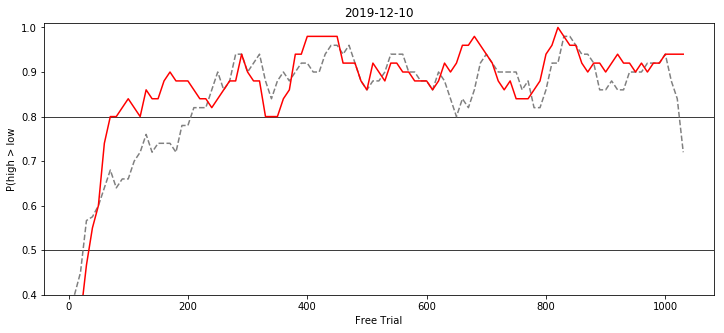

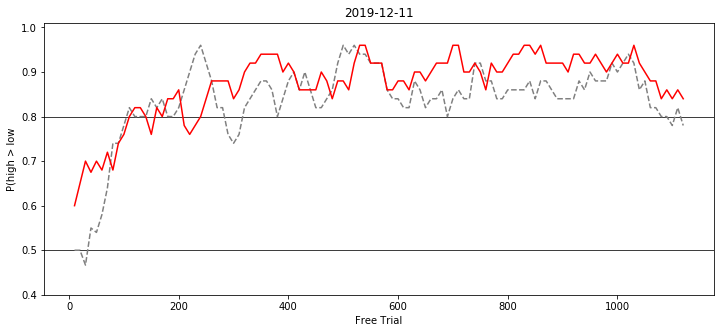

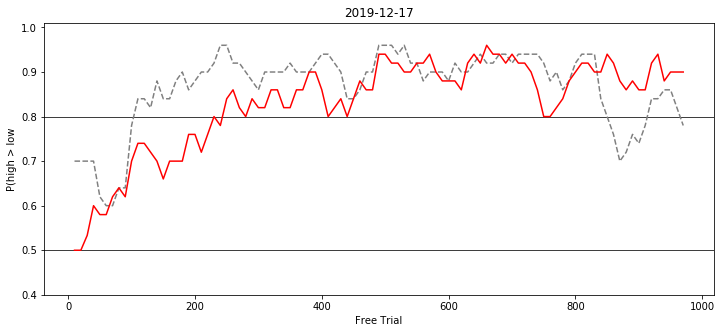

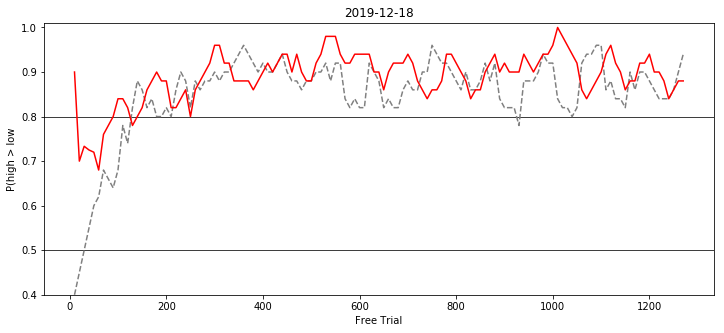

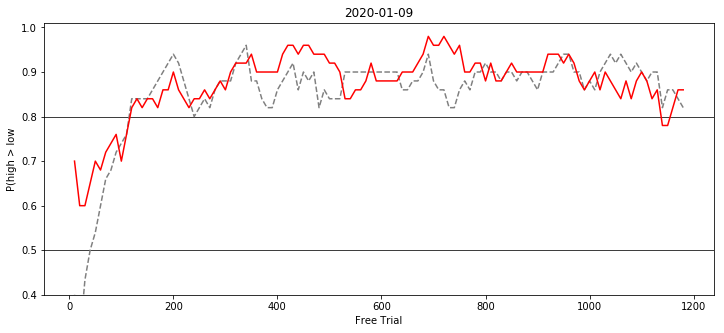

In [170]:
for date in df['date'].unique()[-15:]:
    bhv.plotSession(df,date,series1='model',series2='perf',win_size=50,min_trials=10,win_step=10)

/Users/nate/Desktop/Rotations/Wallis/Code/bhv_analysis.py:203: RuntimeWarning: invalid value encountered in true_divide
  conf_mat = np.divide(conf_mat,n)


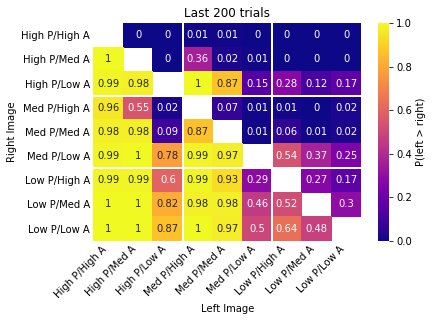

In [126]:
_ = bhv.plotConfusions(sim)

/Users/nate/Desktop/Rotations/Wallis/Code/bhv_analysis.py:203: RuntimeWarning: invalid value encountered in true_divide
  conf_mat = np.divide(conf_mat,n)


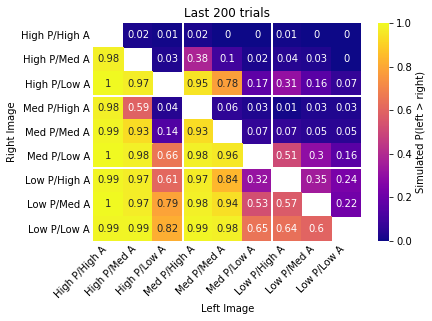

In [125]:
_ = bhv.plotConfusions(sim, 'lr_sim')

[[  0.   0.   0.   1.   1.   0.   0.   0.   0.]
 [117.   0.   0.  45.   3.   1.   0.   0.   0.]
 [122. 116.   0. 111.  97.  17.  32.  14.  20.]
 [109.  70.   3.   0.   8.   1.   1.   0.   2.]
 [120. 120.  10. 104.   0.   1.   7.   1.   2.]
 [118. 119.  94. 128. 118.   0.  62.  42.  30.]
 [124. 111.  75. 117. 114.  36.   0.  31.  19.]
 [127. 116.  98. 126. 120.  52.  64.   0.  36.]
 [122. 121. 111. 112. 121.  60.  68.  57.   0.]]


/Users/nate/Desktop/Rotations/Wallis/Code/bhv_analysis.py:204: RuntimeWarning: invalid value encountered in true_divide
  


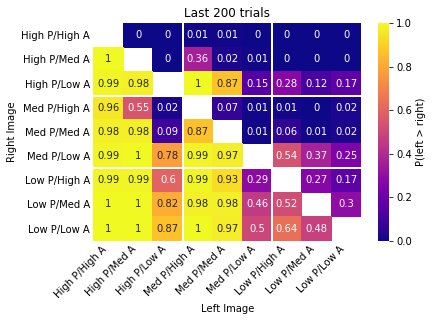

In [142]:
_ = bhv.plotConfusions(sim)

/Users/nate/Desktop/Rotations/Wallis/Code/bhv_analysis.py:203: RuntimeWarning: invalid value encountered in true_divide
  conf_mat = np.divide(conf_mat,n)


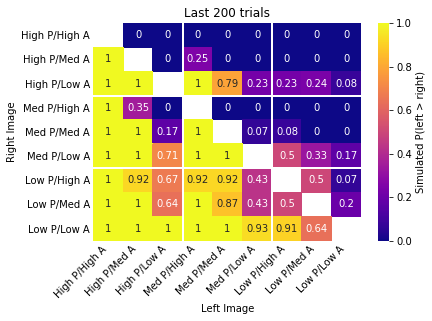

In [117]:
_ = bhv.plotConfusions(sim, 'lr_sim')

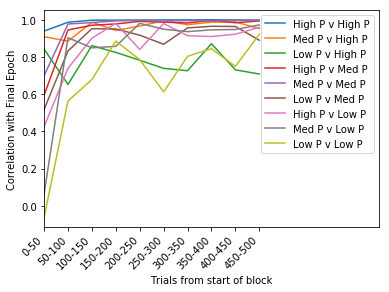

In [149]:
_ = bhv.plotChoiceEvolution(sim, compare='lr_sim', by='prob')

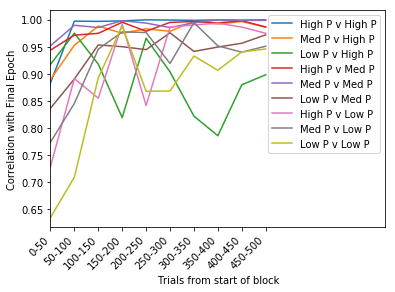

In [150]:
_ = bhv.plotChoiceEvolution(sim, compare='lr', by='prob')

In [ ]:
RWFS = rl.FixedSoftmaxRescorlaWagnerModel()
_,_ = RWFS.fit(master)

In [175]:
pairs = master[master['date']==date].groupby(['date','left_prob_level','left_amnt_level', \
                                            'right_prob_level','right_amnt_level'])

In [176]:
n = pairs['lever'].count().to_numpy()
k = pairs['lever'].sum().to_numpy()

In [184]:
pd.DataFrame({'n':n, 'k':k}, index=pairs.mean().index)

n  \
date       left_prob_level left_amnt_level right_prob_level right_amnt_level       
2019-08-21 1.0             1.0             1.0              2.0               16   
                                                            3.0               16   
                                           2.0              1.0               15   
                                                            2.0               15   
                                                            3.0               15   
...                                                                           ..   
           3.0             3.0             2.0              1.0               16   
                                                            2.0               17   
                                                            3.0               16   
                                           3.0              1.0               18   
                                                            2.0               15   

                                                                                 k  
date       left_prob_level left_amnt_level right_prob_level right_amnt_level        
2019-08-21 1.0             1.0             1.0              2.0              -14.0  
                                                            3.0              -16.0  
                                           2.0              1.0              -15.0  
                                                            2.0              -15.0  
                                                            3.0              -15.0  
...                                                                            ...  
           3.0             3.0             2.0              1.0               16.0  
                                                            2.0               15.0  
                                                            3.0                6.0  
                                           3.0              1.0               12.0  
                                                            2.0               11.0  

[72 rows x 2 columns]